In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import dirichlet
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math


In [2]:
file_path = '/Users/saharawaji/Documents/GitHub/Research/car details v4.csv'
df = pd.read_csv(file_path)
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [3]:
column_names = df.columns
print(column_names)

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
df.isna().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [6]:
# Find unique makes
unique_makes = df['Make'].unique()
# Find unique models
unique_models = df['Model'].unique()
unique_Fuel_Type = df['Fuel Type'].unique()

# You can then print or analyze these lists
print("Unique Makes:", unique_makes)
print("Unique Models:", unique_models)
print("Unique Fuel Type:", unique_Fuel_Type)

Unique Makes: ['Honda' 'Maruti Suzuki' 'Hyundai' 'Toyota' 'Mercedes-Benz' 'BMW' 'Skoda'
 'Nissan' 'Renault' 'Tata' 'Volkswagen' 'Ford' 'Audi' 'Mahindra' 'MG'
 'Jeep' 'Porsche' 'Kia' 'Land Rover' 'Volvo' 'Maserati' 'Jaguar' 'Isuzu'
 'Fiat' 'MINI' 'Ferrari' 'Mitsubishi' 'Datsun' 'Lamborghini' 'Chevrolet'
 'Ssangyong' 'Rolls-Royce' 'Lexus']
Unique Models: ['Amaze 1.2 VX i-VTEC' 'Swift DZire VDI' 'i10 Magna 1.2 Kappa2' ...
 'Ritz Vxi (ABS) BS-IV' 'XUV500 W8 [2015-2017]'
 'Figo Duratec Petrol ZXI 1.2']
Unique Fuel Type: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric' 'CNG + CNG' 'Hybrid'
 'Petrol + CNG' 'Petrol + LPG']


In [7]:

luxury_price_threshold = df['Price'].quantile(.75)
luxury_price_threshold

1925000.0

income = Price

(economical vs. luxury) or fuel type (conventional vs. eco-friendly).
type = Make , Model


def initialize_grid1(df, grid_size):
    grid = np.empty((grid_size, grid_size), dtype=object)
    total_cells = grid_size * grid_size
    num_empty_cells = int(total_cells * 0.1)

    # Set specific number of each agent type
    num_luxury = num_economical = 45
    
    # Select 45 luxury and 45 economical cars
    luxury_cars = df[df['Price'] > luxury_price_threshold].sample(num_luxury)
    economical_cars = df[df['Price'] <= luxury_price_threshold].sample(num_economical)

    empty_cells = random.sample(range(total_cells), num_empty_cells)
   
    # Merge and shuffle them
    selected_cars = pd.concat([luxury_cars, economical_cars]).sample(frac=1).reset_index(drop=True)

    # List of positions for cars
    car_positions = random.sample(range(total_cells), num_luxury + num_economical)

    index = 0
    for i in range(grid_size):
        for j in range(grid_size):
            pos = i * grid_size + j
            if pos in car_positions:
                price = selected_cars.iloc[index]['Price']
                is_luxury = price > luxury_price_threshold
                grid[i, j] = Car(is_luxury, price)
                index += 1
            else:
                grid[i, j] = None

    return grid


In [63]:

class Car:
    def __init__(self, is_luxury, price):
        self.is_luxury = is_luxury
        self.price = price

def initialize_grid(df, grid_size):
    luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Porsche', 'Jaguar']
    economic_brands = ['Honda', 'Toyota', 'Hyundai', 'Nissan', 'Ford', 'Chevrolet']
    
    luxury_price_threshold = 1925000  # Adjust this threshold as needed
    
    # Filter dataset for luxury and economic cars
    luxury_cars = df[df['Make'].isin(luxury_brands)]
    economic_cars = df[df['Make'].isin(economic_brands)]

    # Calculate total number of cells and initialize the grid
    total_cells = grid_size * grid_size
    grid = np.empty((grid_size, grid_size), dtype=object)
    
    # Calculate the number of cells for each car type
    num_luxury = num_economic = 45 
    num_total_cars = num_luxury + num_economic

    num_empty = 10
    num_empty_cells = num_empty
    
    if num_total_cars + num_empty_cells > total_cells:
        raise ValueError("Total number of cars and empty cells exceeds grid capacity.")
    
    # Randomly select positions for luxury, economic cars, and empty cells
    positions = random.sample(range(total_cells), num_total_cars + num_empty_cells)

    luxury_positions = positions[:num_luxury]
    economic_positions = positions[num_luxury:num_luxury + num_economic]
    empty_positions = positions[num_luxury + num_economic:]
    
    # Initialize an index for luxury and economic cars
    luxury_index = economic_index = 0
    
    # Fill the grid with Car objects or empty cells
    for i in range(grid_size):
        for j in range(grid_size):
            pos = i * grid_size + j
            if pos in luxury_positions and not luxury_cars.empty:
                car = luxury_cars.iloc[luxury_index % len(luxury_cars)]
                grid[i, j] = Car(True, car['Price'])
                luxury_index += 1
            elif pos in economic_positions and not economic_cars.empty:
                car = economic_cars.iloc[economic_index % len(economic_cars)]
                grid[i, j] = Car(False, car['Price'])
                economic_index += 1
            elif pos in empty_positions:
                grid[i, j] = None
    
    return grid


grid_size = 10

grid = initialize_grid(df, grid_size)

# Print the grid with car prices
for row in grid:
    for cell in row:
        if cell is None:
            print("Empty", end='\t')
        else:
            car_type = "Luxury" if cell.is_luxury else "Economic"
            print(f"Car ({car_type}, Price: {cell.price:.2f})", end='\t')
    print()


Car (Luxury, Price: 1898999.00)	Car (Luxury, Price: 2650000.00)	Car (Luxury, Price: 3850000.00)	Car (Economic, Price: 505000.00)	Car (Economic, Price: 220000.00)	Car (Economic, Price: 799000.00)	Car (Economic, Price: 1950000.00)	Car (Luxury, Price: 2300000.00)	Empty	Car (Economic, Price: 575000.00)	
Car (Economic, Price: 591000.00)	Car (Economic, Price: 740000.00)	Car (Luxury, Price: 1575000.00)	Car (Economic, Price: 589000.00)	Car (Luxury, Price: 2400000.00)	Car (Luxury, Price: 3800000.00)	Car (Luxury, Price: 2800000.00)	Car (Luxury, Price: 1800000.00)	Car (Luxury, Price: 1250000.00)	Car (Economic, Price: 999000.00)	
Car (Economic, Price: 1175000.00)	Car (Luxury, Price: 2250000.00)	Car (Luxury, Price: 1100000.00)	Car (Luxury, Price: 2900000.00)	Car (Luxury, Price: 2990000.00)	Car (Luxury, Price: 1650000.00)	Car (Luxury, Price: 2950000.00)	Car (Luxury, Price: 3900000.00)	Car (Luxury, Price: 16200000.00)	Car (Economic, Price: 351000.00)	
Empty	Car (Economic, Price: 551000.00)	Empty	Car 

In [64]:
def calculate_mean_car_price(grid):
    total_price = 0
    total_count = 0

    for row in grid:
        for cell in row:
            if cell is not None:
                total_price += cell.price
                total_count += 1

    if total_count == 0:
        return 0  # Avoid division by zero if there are no cars

    mean_price = total_price / total_count
    return mean_price

# Example usage:
mean_price = calculate_mean_car_price(grid)
print(f"Mean Car Price: {mean_price:.2f}")


Mean Car Price: 2065177.76


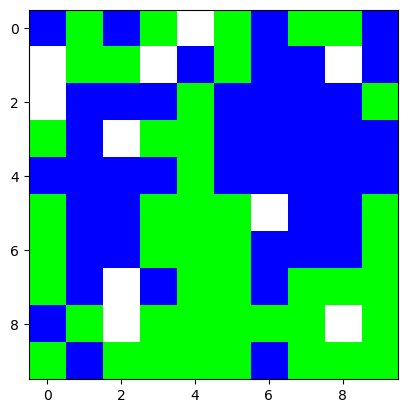

Number of Luxury Cars: 45
Number of Economical Cars: 45


In [65]:
def assign_colors(car):
    if car is None:
        return (0, 0, 0, 0)  # Transparent for empty cell
    return (0, 0, 1, 1) if car.is_luxury else (0, 1, 0, 1)  # Blue for luxury, Green for economical



# Initialize the grid with 45 luxury cars, 45 economical cars, and 10 empty cells
grid_size = 10

grid = initialize_grid(df, grid_size)


# Assign colors and visualize the grid
color_grid = np.empty((grid_size, grid_size, 4), dtype=float)
for i in range(grid_size):
    for j in range(grid_size):
        color_grid[i, j] = assign_colors(grid[i, j])

def grid_to_list(grid):
    grid_list = []
    for row in grid:
        row_list = []
        for car in row:
            if car is None:
                row_list.append("Empty")
            else:
                car_type = "Luxury" if car.is_luxury else "Economical"
                row_list.append(f"Car(Type: {car_type}, Price: {car.price})")
        grid_list.append(row_list)
    return grid_list

# Convert the grid to a list format
grid_list = grid_to_list(grid)

# Visualizing the grid using matplotlib
plt.imshow(color_grid)
plt.show()

def count_car_types(grid):
    count_luxury = 0
    count_economical = 0

    for row in grid:
        for car in row:
            if car is not None:
                if car.is_luxury:
                    count_luxury += 1
                else:
                    count_economical += 1

    return count_luxury, count_economical

# Count the number of luxury and economical cars in the grid
count_luxury, count_economical = count_car_types(grid)

print(f"Number of Luxury Cars: {count_luxury}")
print(f"Number of Economical Cars: {count_economical}")


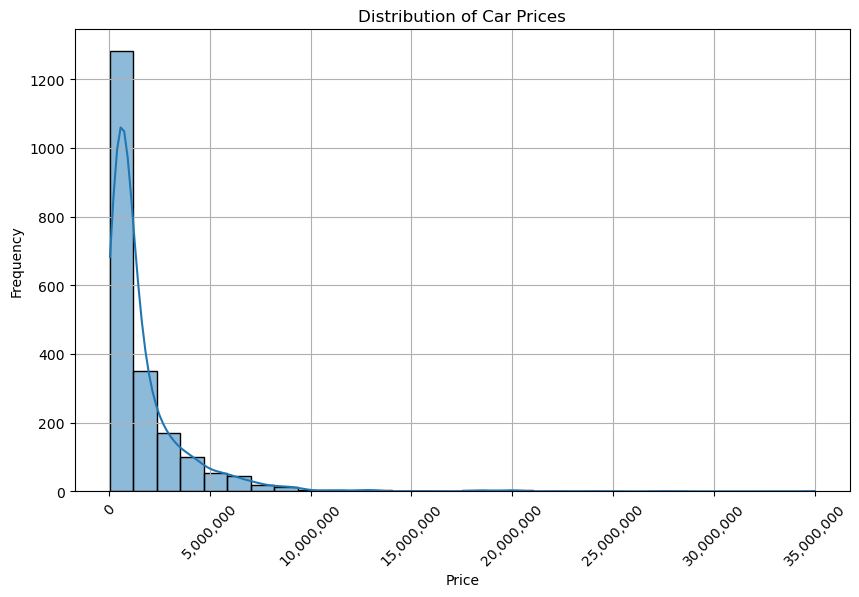

In [66]:

# Assuming df is your DataFrame and it contains a 'Price' column

# Histogram to visualize the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)  # Adjust the number of bins as needed

# Set the x-axis label formatting
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # No scientific notation, with comma as thousand separator

plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)  # Optional: Adds a grid for easier reading

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if necessary

plt.savefig('Distribution_of_Price.png')
plt.show()


In [67]:
def assign_colors(car):
    if car is None:
        return (0, 0, 0, 0)  # Transparent for empty cell
    return (0, 0, 1, 1) if car.is_luxury else (0, 1, 0, 1)  # Blue for luxury, Green for economical

def update_color_grid(grid, grid_size):
    print(f"Expected grid size: {grid_size}x{grid_size}")
    actual_grid_shape = grid.shape if isinstance(grid, np.ndarray) else (len(grid), len(grid[0]) if grid else 'N/A')
    print(f"Actual grid size: {actual_grid_shape}")

    assert isinstance(grid, (np.ndarray, list)) and actual_grid_shape == (grid_size, grid_size), "Grid size mismatch"

    # Create a new color grid based on the current state of the grid
    color_grid = np.empty((grid_size, grid_size, 4), dtype=float)
    for i in range(grid_size):
        for j in range(grid_size):
            color_grid[i][j] = assign_colors(grid[i][j])
    return color_grid

# Assuming grid and grid_size are already defined
# initial_color_grid = update_color_grid(grid, grid_size)


In [68]:
def is_happy(grid, pos, grid_size):
    i, j = pos
    car = grid[i][j]
    
    if car is None:
        return False  
    is_luxury_car = car.is_luxury
    
    same_type_count = 0 
    for x in [-1, 0, 1]:
        for y in [-1, 0, 1]:

            if x == y == 0:
                continue  # Skip the cell itself
            if 0 <= i + x < grid_size and 0 <= j + y < grid_size and grid[i + x, j + y] is not None and grid[i + x, j + y].is_luxury == is_luxury_car:
                same_type_count += 1
    # Defining homogeneity threshold based on the cell position
    if (i == 0 or i == grid_size-1) and (j == 0 or j == grid_size-1):  # Corner cell
        similarity_threshold = 2
    elif i == 0 or i == grid_size-1 or j == 0 or j == grid_size-1:  # Edge cell
        similarity_threshold = 3
    else:  # Inner cell
        similarity_threshold = 4

    return same_type_count >= similarity_threshold



In [69]:

def unif(length):
    """
    Return a list of random values of given length that sum to 1.
    """
    values = [random.random() for _ in range(length)]
    total = sum(values)
    return [value / total for value in values]

def getAdjacentAgents(grid, x, y):
    neighbors = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue  # Skip the cell itself
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx][ny] is not None:
                neighbors.append((nx, ny))
    return neighbors


def getAdjacentAgents1(grid, i, j):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    neighbors = []
    for di, dj in directions:
        ni, nj = i + di, j + dj
        if 0 <= ni < len(grid) and 0 <= nj < len(grid[0]):
            neighbors.append((ni, nj))
    return neighbors

def INCOMEDYNAMIC1(grid, i, j):
    car = grid[i][j]
    neighbors = getAdjacentAgents(grid, i, j)
    total_distribution = 0.01 * car.price  
    car.price -= total_distribution  

    # Normalize the distributed amounts to sum up to the total_distribution
    if neighbors:  
        distributed_amounts = unif(len(neighbors))
        normalized_distributed_amounts = [amount * total_distribution for amount in distributed_amounts]
        for index, (x, y) in enumerate(neighbors):
            grid[i][j].price += normalized_distributed_amounts[index]

    return grid


In [70]:

def move_agents3(grid, grid_size, move_percentage=0.01, threshold=0.50, distribution_percentage=0.10):
    happiness_count = 0
    remain_count = 0
    empty_cells = [(i, j) for i in range(grid_size) for j in range(grid_size) if grid[i][j] is None]

    for i in range(grid_size):
        for j in range(grid_size):
            car = grid[i][j]

            if car is not None:  # Check if the cell contains a car
                current_happiness = is_happy(grid, (i, j), grid_size)
                money_to_distribute = car.price * distribution_percentage
                movement_cost = move_percentage * car.price

                # Check if the car can afford the cost to move and distribute
                if car.price - (movement_cost + money_to_distribute) >= threshold:
                    # If the car is unhappy, consider moving it
                    if not current_happiness:
                        # Distribute "money" to neighbors before moving
                        INCOMEDYNAMIC1(grid, i, j)
                        
                        # Subtract the total cost from the car's price
                        car.price -= (movement_cost + money_to_distribute)

                        # Move the car to a new cell
                        if empty_cells:
                            new_position = random.choice(empty_cells)
                            empty_cells.remove(new_position)
                            grid[new_position[0]][new_position[1]] = car
                            grid[i][j] = None
                            empty_cells.append((i, j))

                            # Check happiness after moving
                            if is_happy(grid, new_position, grid_size):
                                happiness_count += 1
                    else:
                        # The car is happy and does not move
                        remain_count += 1
                        happiness_count += 1
                else:
                    # The car cannot afford to move or distribute money
                    remain_count += 1
                    if current_happiness:
                        happiness_count += 1

    total_cars = np.sum([1 for i in range(grid_size) for j in range(grid_size) if grid[i][j] is not None])
    happiness = happiness_count / total_cars if total_cars != 0 else 0
    unhappiness = (total_cars - happiness_count) / total_cars if total_cars != 0 else 0

    remain_probability = remain_count / total_cars

    return happiness, unhappiness, remain_probability


Number of Luxury Cars: 45
Number of Economical Cars: 45


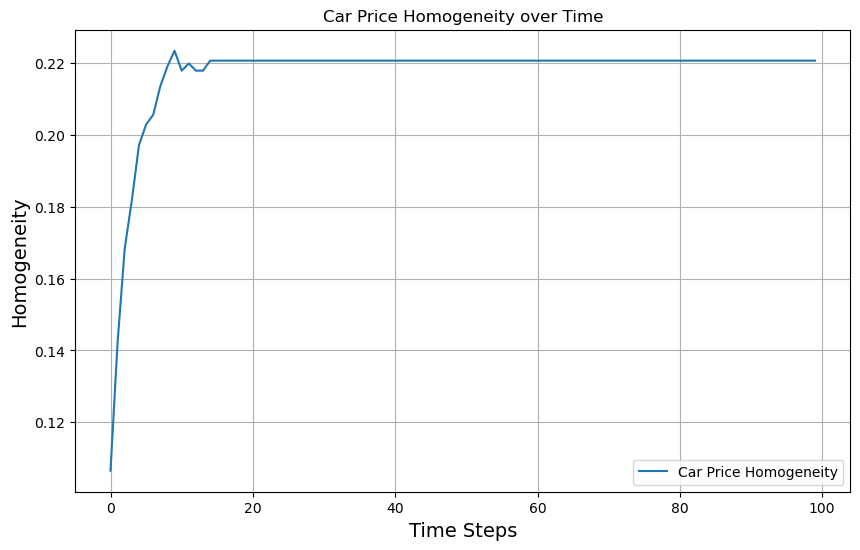

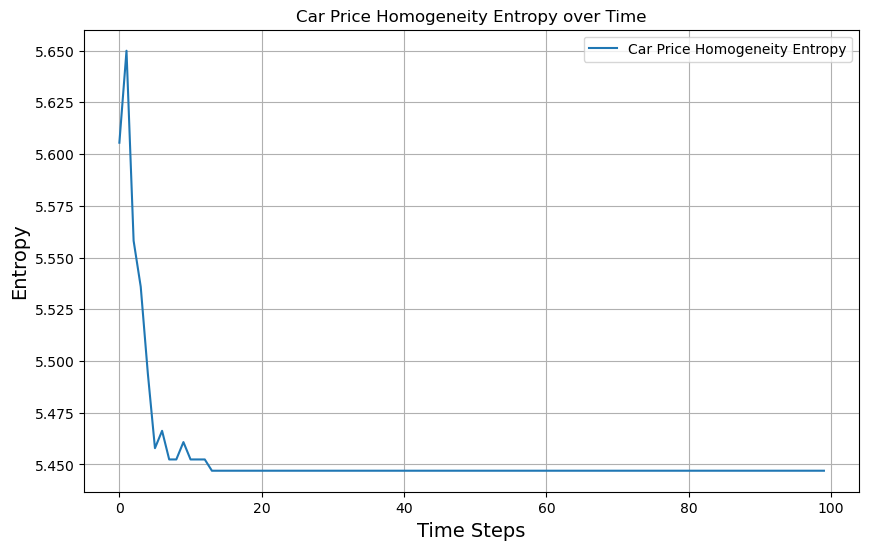

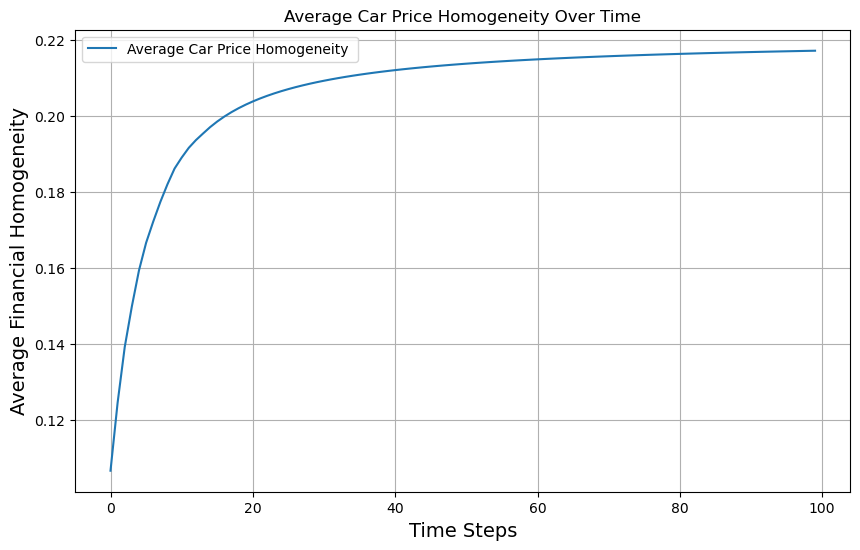

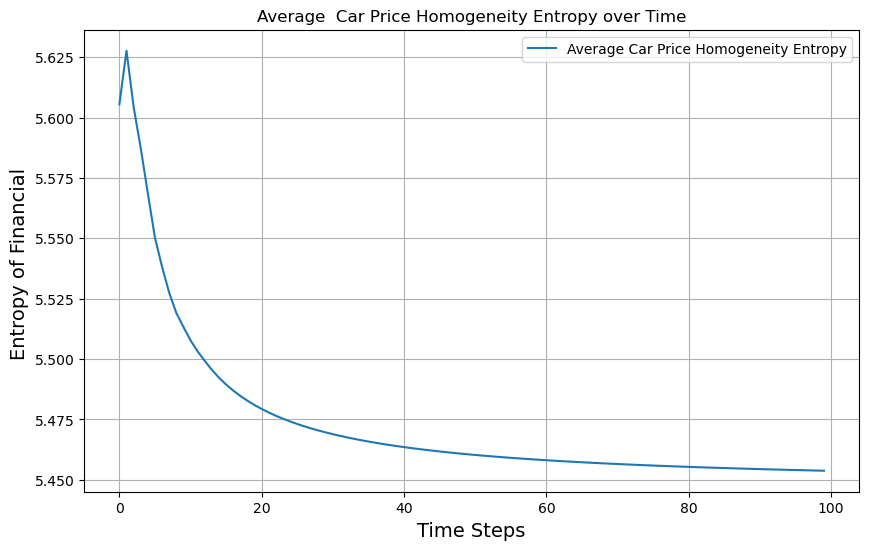

In [57]:

def compute_homogeneity_financial(grid, threshold = 200000 , bracket_size = 50000):
    total_pairs = 0
    similar_pairs = 0
    income_brackets = {}
    financial_counts = {}

    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if grid[i][j] is None:
                continue
            # Access the price attribute from the Car object
            bracket = grid[i][j].price // bracket_size
            income_brackets[bracket] = income_brackets.get(bracket, 0) + 1
            
            neighbors = getAdjacentAgents(grid, i, j)
            for ni, nj in neighbors:
                if grid[ni][nj] is not None:
                    total_pairs += 1
                    # Access the price attribute from the neighbor Car object
                    if abs(grid[i][j].price - grid[ni][nj].price) <= threshold:
                        similar_pairs += 1

                        # Count this pair as similar for the specific bracket
                        financial_counts[bracket] = financial_counts.get(bracket, 0) + 1
                                                
                        
    financial_homogeneity = similar_pairs / total_pairs if total_pairs else 0
    total_agents = sum(1 for row in grid for car in row if car is not None)
    
    financial_probabilities = {bracket: count / total_agents for bracket, count in income_brackets.items()}
    
    financial_entropy = -sum(prob * math.log2(prob) for prob in financial_probabilities.values() if prob > 0)

    return financial_homogeneity, financial_counts, financial_probabilities, financial_entropy



def run_simulation1(grid, grid_size):
      
    aggregated_financial_counts = {}    

    
    grids=[]

    financial_homogeneity_over_time = []
    financial_entropy_over_time = []

    for _ in range(num_time_steps):
        happiness, unhappiness, remain_probability = move_agents3(grid, grid_size)

        # Calculate and append the estimated probability of an agent being happy
        #happiness_results.append(happiness)
        #average_happiness = np.mean(happiness_results)
        
      
        # Financial Homogeneity and Entropy
        financial_homogeneity, _, financial_counts, financial_entropy= compute_homogeneity_financial(grid)
        financial_homogeneity_over_time.append(financial_homogeneity)
        financial_entropy_over_time.append(financial_entropy)

       # Aggregate the financial counts for each bracket
        for bracket, count in financial_counts.items():
            aggregated_financial_counts[bracket] = aggregated_financial_counts.get(bracket, 0) + count
            
           
            
    # Now calculate the probability distribution based on the aggregated counts
    total_counts = sum(aggregated_financial_counts.values())
    financial_probabilities_overall = {bracket: count / total_counts for bracket, count in aggregated_financial_counts.items()}


    average_financial_homogeneity = [np.mean(financial_homogeneity_over_time[:i + 1]) for i in range(len(financial_homogeneity_over_time))]
    average_financial_entropy_homogeneity = [np.mean(financial_entropy_over_time[:i+1]) for i in range(len(financial_entropy_over_time))]

    return {
       'grids': grids,

        
        'financial_homogeneity_over_time': financial_homogeneity_over_time,
        'financial_entropy_over_time': financial_entropy_over_time,
        'financial_probabilities_overall': financial_probabilities_overall,
        'average_financial_homogeneity':average_financial_homogeneity,
        'average_financial_entropy_homogeneity':average_financial_entropy_homogeneity
    

    }


#random.seed(42)

num_time_steps = 100
grid_size = 10  

grid = initialize_grid(df, grid_size)

# Run the simulation
results = run_simulation1(grid, grid_size) 

# Count the number of luxury and economical cars in the grid
count_luxury, count_economical = count_car_types(grid)

print(f"Number of Luxury Cars: {count_luxury}")
print(f"Number of Economical Cars: {count_economical}")

######################
#Visualization 


# Part 2 

#  1. Plotting the Financial Homogeneity and Entropy over time
plt.figure(figsize=(10, 6))

#Plot for Financial Homogeneity

plt.plot(results['financial_homogeneity_over_time'], label="Car Price Homogeneity")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Homogeneity',fontsize=14)
plt.title('Car Price Homogeneity over Time')
plt.grid(True)

plt.savefig('Car_Price_homogeneity_over_time.png')
plt.legend()
plt.show()

#Plot for Financial Entropy
plt.figure(figsize=(10, 6))
plt.plot(results['financial_entropy_over_time'], label="Car Price Homogeneity Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Entropy',fontsize=14)
plt.title('Car Price Homogeneity Entropy over Time')
plt.grid(True)

plt.savefig('Car_Price_entropy_over_time.png')

plt.legend()
#plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(results['average_financial_homogeneity'], label="Average Car Price Homogeneity ")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Average Financial Homogeneity',fontsize=14)
plt.title('Average Car Price Homogeneity Over Time')
plt.grid(True)
plt.savefig('average_Car_Price_homogeneity.png')

plt.legend()
plt.show()


plt.figure(figsize=(10, 6))

plt.plot(results['average_financial_entropy_homogeneity'], label="Average Car Price Homogeneity Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Entropy of Financial ',fontsize=14)
plt.title('Average  Car Price Homogeneity Entropy over Time')
plt.grid(True)
plt.savefig('average_Car_Price_entropy_homogeneity.png')
plt.legend()
#plt.tight_layout()
plt.show()

### 


In [18]:
def compute_homogeneity_identity(grid):
    identity_homogeneity = 0
    identity_homogeneity_counts = {}
    total_agents = 0
    N = len(grid)
    identity_configurations = set()

    for i in range(N):
        for j in range(N):
            if grid[i][j] is not None:
                car = grid[i][j]
                # Assuming luxury cars are type 1 and others are type 0
                car_type = 1 if car.is_luxury else 0
                pos = (i, j)

                if is_happy(grid, pos, N):
                    identity_homogeneity += 1

                identity_homogeneity_counts[car_type] = identity_homogeneity_counts.get(car_type, 0) + 1
                total_agents += 1
                identity_configurations.add(car_type)

                # Neighbor checking logic
                neighbors = getAdjacentAgents(grid, i, j)
                different_type_count = sum(1 for (x, y) in neighbors if grid[x][y] is not None and (1 if grid[x][y].is_luxury else 0) != car_type)

                if different_type_count > len(neighbors) / 2:
                    # Flipping the car's luxury status
                    car.is_luxury = not car.is_luxury

    identity_probabilities = {car_type: count / total_agents for car_type, count in identity_homogeneity_counts.items()}
    
    entropy_identity = -sum(p * math.log2(p) for p in identity_probabilities.values() if p > 0)

    return identity_homogeneity / total_agents, identity_probabilities, identity_homogeneity_counts, entropy_identity



Number of Luxury Cars: 30
Number of Economical Cars: 60


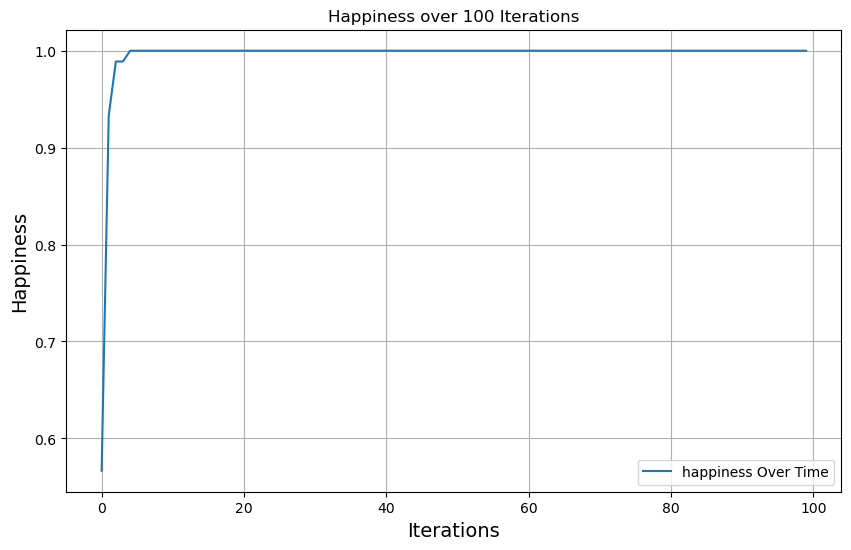

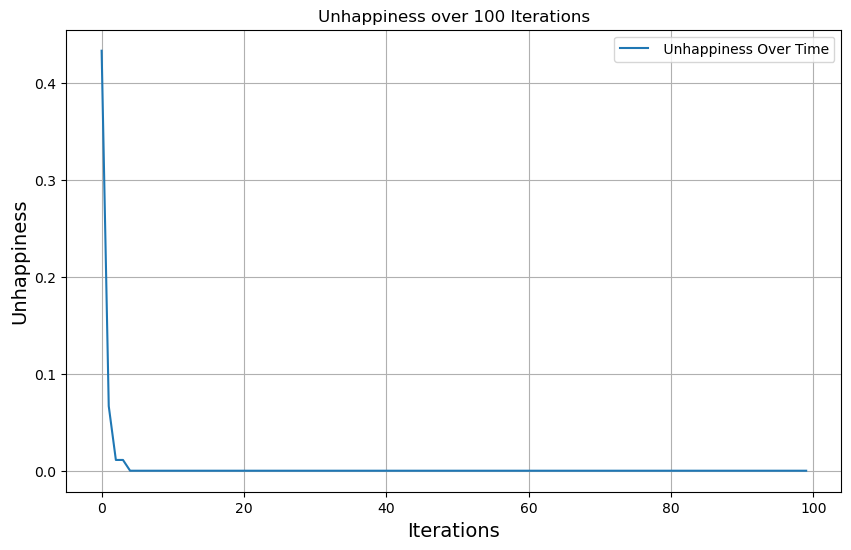

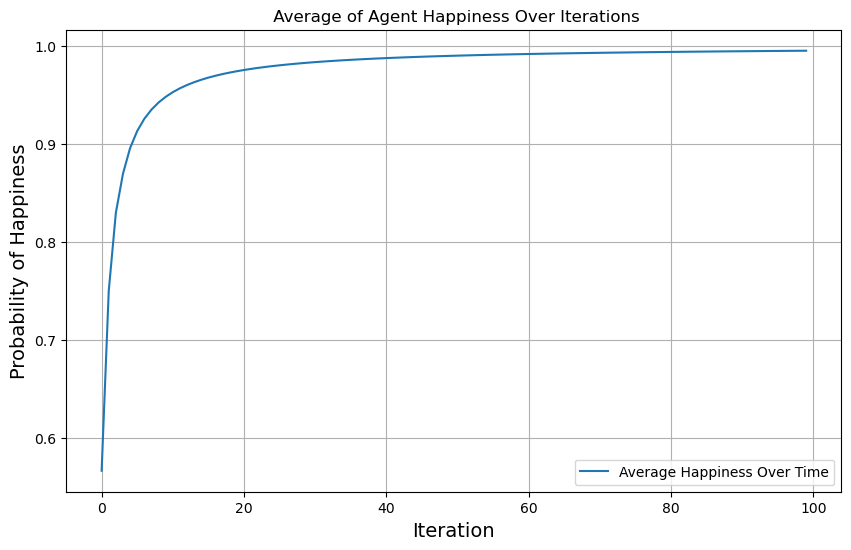

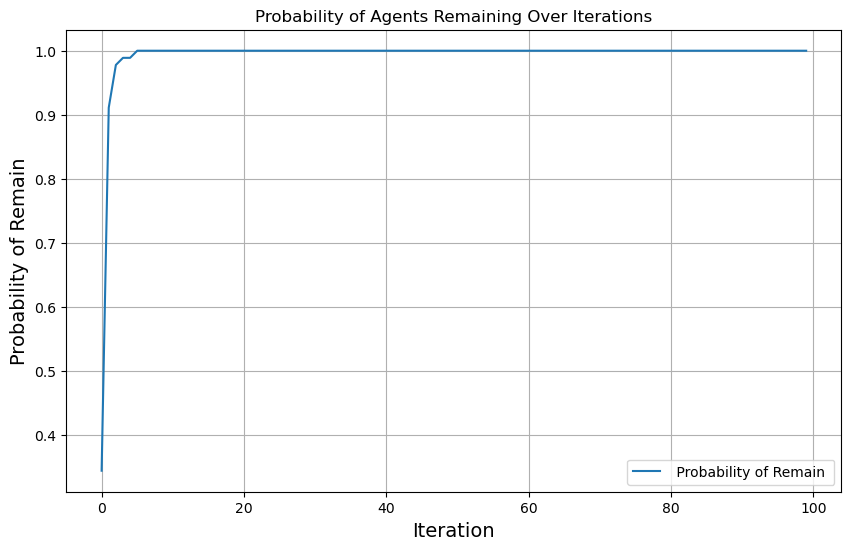

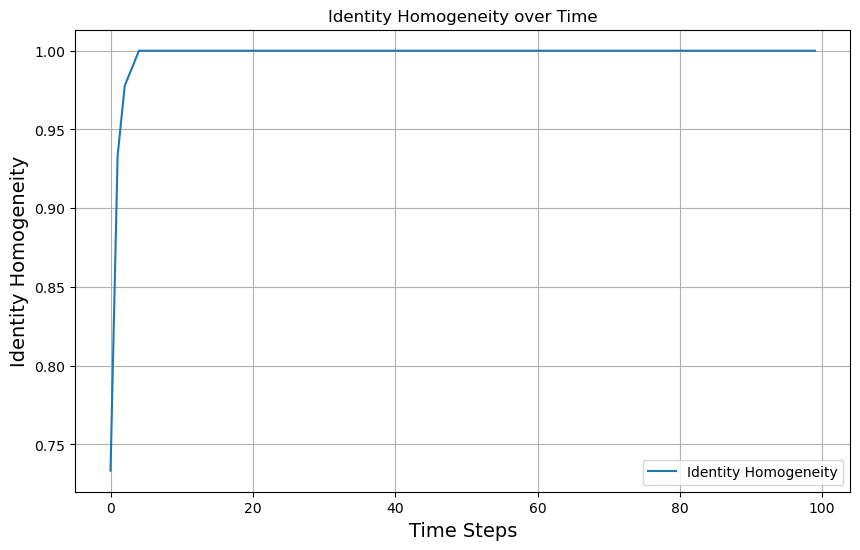

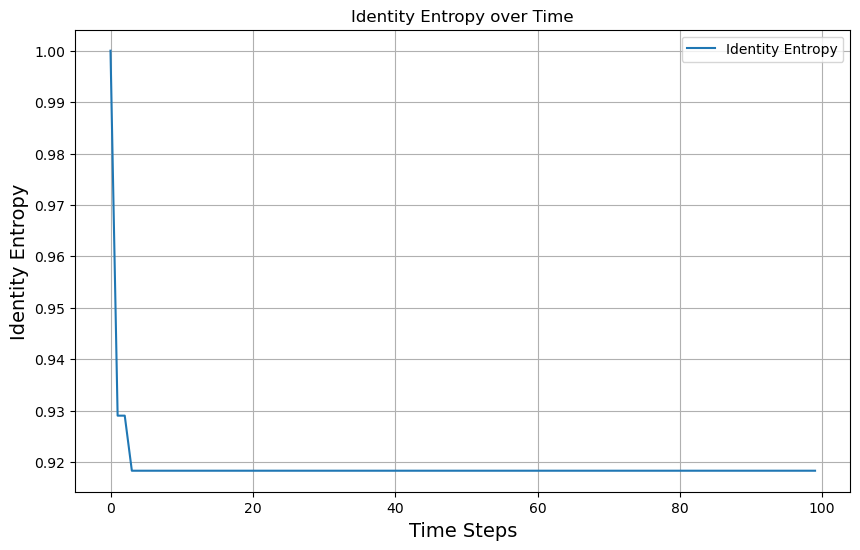

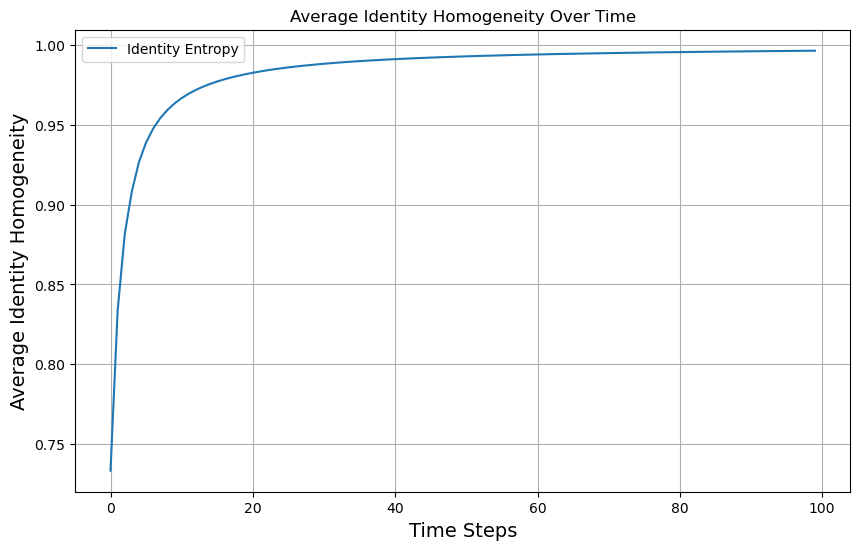

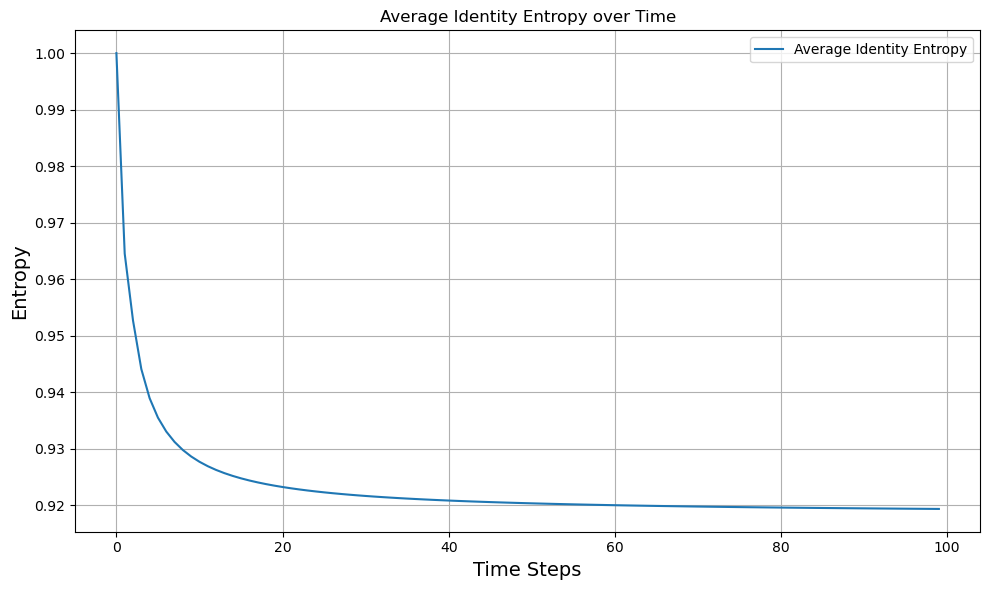

Expected grid size: 10x10
Actual grid size: (10, 10)


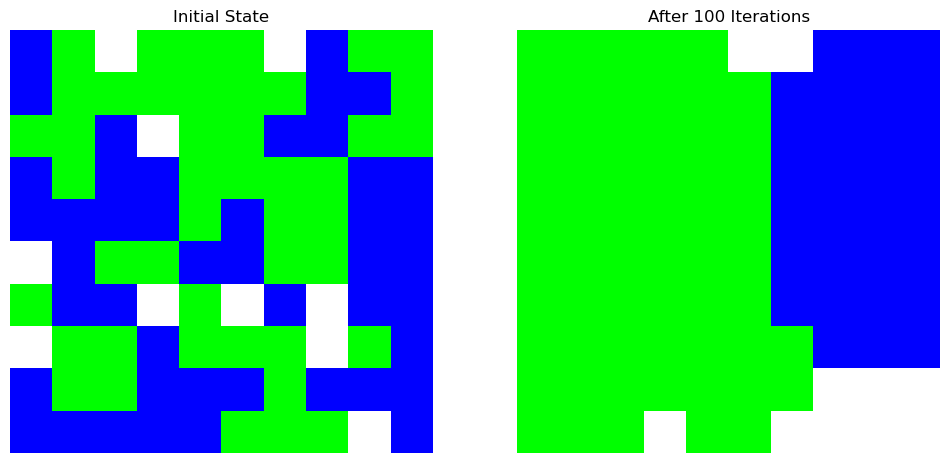

In [60]:
def run_simulation(grid, grid_size):
      
    aggregated_identity_counts = {}  
    aggregated_financial_counts = {}    

    
    grids=[]
    
    happiness_over_time = []
    unhappiness_over_time = []
    remain_probabilities = []
    
    happiness_results = []
    
    identity_homogeneity_over_time = []
    identity_entropy_over_time = []
    
    financial_homogeneity_over_time = []
    financial_entropy_over_time = []

    for _ in range(num_time_steps):
        happiness, unhappiness, remain_probability = move_agents3(grid, grid_size)
        happiness_over_time.append(happiness)
        unhappiness_over_time.append(unhappiness)
        remain_probabilities.append(remain_probability)
        
        # Calculate and append the estimated probability of an agent being happy
        happiness_results.append(happiness)
        average_happiness = np.mean(happiness_results)
        
        # Identity Homogeneity and Entropy
        identity_homogeneity, _, identity_homogeneity_counts, entropy_identity = compute_homogeneity_identity(grid)
        identity_homogeneity_over_time.append(identity_homogeneity)
        identity_entropy_over_time.append(entropy_identity)

        # Aggregate identity counts
        for identity, count in identity_homogeneity_counts.items():
            aggregated_identity_counts[identity] = aggregated_identity_counts.get(identity, 0) + count
        
        # Financial Homogeneity and Entropy
        financial_homogeneity, _, financial_counts, financial_entropy= compute_homogeneity_financial(grid)
        financial_homogeneity_over_time.append(financial_homogeneity)
        financial_entropy_over_time.append(financial_entropy)

       # Aggregate the financial counts for each bracket
        for bracket, count in financial_counts.items():
            aggregated_financial_counts[bracket] = aggregated_financial_counts.get(bracket, 0) + count
            
    # Calculate the overall identity probabilities based on the aggregated counts
    total_identity_counts = sum(aggregated_identity_counts.values())
    identity_probabilities_overall = {identity: count / total_identity_counts for identity, count in aggregated_identity_counts.items()}
                
            
    # Now calculate the probability distribution based on the aggregated counts
    total_counts = sum(aggregated_financial_counts.values())
    financial_probabilities_overall = {bracket: count / total_counts for bracket, count in aggregated_financial_counts.items()}

    # Calculating average metrics over time
    average_happiness_over_time = [np.mean(happiness_over_time[:i + 1]) for i in range(len(happiness_over_time))]
    
    average_identity_homogeneity = [np.mean(identity_homogeneity_over_time[:i + 1]) for i in range(len(identity_homogeneity_over_time))]
    average_identity_entropy_homogeneity = [np.mean(identity_entropy_over_time[:i+1]) for i in range(len(identity_entropy_over_time))]
   
    average_financial_homogeneity = [np.mean(financial_homogeneity_over_time[:i + 1]) for i in range(len(financial_homogeneity_over_time))]
    average_financial_entropy_homogeneity = [np.mean(financial_entropy_over_time[:i+1]) for i in range(len(financial_entropy_over_time))]

    return {
       'grids': grids,

        'happiness_over_time': happiness_over_time,
        'unhappiness_over_time': unhappiness_over_time,
        'average_happiness_over_time': average_happiness_over_time,        
        'remain_probabilities' : remain_probabilities, 
        
        'identity_homogeneity_over_time': identity_homogeneity_over_time,
        'identity_entropy_over_time': identity_entropy_over_time,
        'identity_probabilities_overall':identity_probabilities_overall,
        'average_identity_homogeneity':average_identity_homogeneity, 
        'average_identity_entropy_homogeneity':average_identity_entropy_homogeneity,
        
        'financial_homogeneity_over_time': financial_homogeneity_over_time,
        'financial_entropy_over_time': financial_entropy_over_time,
        'financial_probabilities_overall': financial_probabilities_overall,
        'average_financial_homogeneity':average_financial_homogeneity,
        'average_financial_entropy_homogeneity':average_financial_entropy_homogeneity
    

    }


#random.seed(42)

num_time_steps = 100
grid_size = 10  

grid = initialize_grid(df, grid_size)

# Run the simulation
results = run_simulation(grid, grid_size) 

# Count the number of luxury and economical cars in the grid
count_luxury, count_economical = count_car_types(grid)

print(f"Number of Luxury Cars: {count_luxury}")
print(f"Number of Economical Cars: {count_economical}")

######################
#Visualization 

# Part 1 

# 1. Happiness and Unhappiness Over Time 

plt.figure(figsize=(10, 6))

plt.plot(results['happiness_over_time'],label = "happiness Over Time")
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Happiness',fontsize=14)
plt.title('Happiness over 100 Iterations')
plt.grid(True)
plt.savefig('happiness_over_time.png')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
# 2. Unhappiness Over Time 
plt.plot(results['unhappiness_over_time'],label = " Unhappiness Over Time")
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Unhappiness',fontsize=14)
plt.title('Unhappiness over 100 Iterations')
plt.grid(True)

plt.savefig('unhappiness_over_time.png')
plt.legend()
#plt.tight_layout()
plt.show()


#  Average Happiness and Probability of Agents Remaining
plt.figure(figsize=(10, 6))
plt.plot(results['average_happiness_over_time'], label='Average Happiness Over Time')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Probability of Happiness',fontsize=14)
plt.title(' Average of Agent Happiness Over Iterations')
plt.grid(True)
plt.savefig('average_happiness_over_time.png')
plt.legend()
plt.show()

# 4. Probability of Remain 
plt.figure(figsize=(10, 6))
plt.plot(results['remain_probabilities'] , label=' Probability of Remain ')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Probability of Remain',fontsize=14)
plt.title('Probability of Agents Remaining Over Iterations')
plt.grid(True)
plt.savefig('remain_probabilities.png')
plt.legend()
#plt.tight_layout()
plt.show()



##################################
# 2. Plotting the Identity Homogeneity and Entropy over time

plt.figure(figsize=(10, 6))
#Plot for Identity Homogeneity
plt.plot(results['identity_homogeneity_over_time'], label="Identity Homogeneity")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Identity Homogeneity',fontsize=14)
plt.title('Identity Homogeneity over Time')
plt.grid(True)
plt.savefig('identity_homogeneity_over_time.png')
plt.legend()
plt.show()

#Plot for Identity Entropy
plt.figure(figsize=(10, 6))
plt.plot(results['identity_entropy_over_time'], label="Identity Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Identity Entropy',fontsize=14)
plt.title('Identity Entropy over Time')
plt.grid(True)
plt.savefig('identity_entropy_over_time.png')
plt.legend()
#plt.tight_layout()
plt.show()

### 

plt.figure(figsize=(10, 6))
# Plotting the average probabilities of identity types over time
#Average Identity Homogeneity and Average Entropy Over Time
plt.plot(results['average_identity_homogeneity'], label="Identity Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Average Identity Homogeneity',fontsize=14)
plt.title('Average Identity Homogeneity Over Time')
plt.grid(True)
plt.savefig('average_identity_homogeneity.png')
plt.legend()  
plt.show()

Identity = list(results['identity_probabilities_overall'].keys())
probabilities1 = list(results['identity_probabilities_overall'].values())

plt.figure(figsize=(10, 6))    
plt.plot(results['average_identity_entropy_homogeneity'], label="Average Identity Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Entropy',fontsize=14)
plt.title('Average Identity Entropy over Time')
plt.grid(True)
plt.savefig('average_identity_entropy_homogeneity.png')
plt.legend()
plt.tight_layout()
plt.show()




# Part 3 

# plot the grid befor and  after the simulation

# Initial color grid

final_color_grid = update_color_grid(grid, grid_size)

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot initial color grid
axes[0].imshow(color_grid, interpolation='nearest')
axes[0].set_title('Initial State')
plt.savefig('color_grid.png')

axes[0].axis('off')

# Plot final color grid after 100 iterations
axes[1].imshow(final_color_grid, interpolation='nearest')
axes[1].set_title('After 100 Iterations')
axes[1].axis('off')
plt.savefig('final_color_grid.png')

# Show the plots
plt.show()



In [ ]:


# Part 2 

#  1. Plotting the Financial Homogeneity and Entropy over time
plt.figure(figsize=(10, 6))

#Plot for Financial Homogeneity

plt.plot(results['financial_homogeneity_over_time'], label="Car Price Homogeneity")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Homogeneity',fontsize=14)
plt.title('Car Price Homogeneity over Time')
plt.grid(True)

plt.savefig('Car_Price_homogeneity_over_time.png')
plt.legend()
plt.show()

#Plot for Financial Entropy
plt.figure(figsize=(10, 6))
plt.plot(results['financial_entropy_over_time'], label="Car Price  Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Entropy',fontsize=14)
plt.title('Car Price Homogeneity Entropy over Time')
plt.grid(True)

plt.savefig('Car_Price_entropy_over_time.png')

plt.legend()
#plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(results['average_financial_homogeneity'], label="Average Car Price Homogeneity ")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Average Financial Homogeneity',fontsize=14)
plt.title('Average Car Price Homogeneity Over Time')
plt.grid(True)
plt.savefig('average_Car_Price_homogeneity.png')

plt.legend()
plt.show()

### 


#Plot for Probabilities of Financial Homogeneity


plt.figure(figsize=(10, 6))

plt.plot(results['average_financial_entropy_homogeneity'], label="Average Car Price Homogeneity Entropy")
plt.xlabel('Time Steps',fontsize=14)
plt.ylabel('Entropy of Financial ',fontsize=14)
plt.title('Average  Car Price Homogeneity Entropy over Time')
plt.grid(True)
plt.savefig('average_Car_Price_entropy_homogeneity.png')
plt.legend()
#plt.tight_layout()
plt.show()

